In [1]:
import xarray
import numpy as np

MONTH_IDXS = [4,5,6,7,8,9]
NUMBER_OF_DAYS = 182
YEAR_IDXS = [0,2,4]

In [2]:
dpath = '/Users/joefennell/geospatial/ukprecip/pr_rcp85_land-cpm_uk_5km_01_mon-20y_200912-207911.nc'
ds = xarray.open_dataset(dpath)
ds = (
        ds.isel(ensemble_member=0) # select a single ensemble member
        .where(ds.month_number.isin(MONTH_IDXS)) # select all relevant months
        .dropna(dim="time") # drop any NAs generated by previous step
        .groupby("year") # group by year (central year of year band)
        .mean() # calculate mean of all relevant months in each year band
        .isel(year=YEAR_IDXS) # select only year bands of interest
    ) # multiply by n days to get total period rainfall
precip = (ds['pr'] * NUMBER_OF_DAYS).astype('uint16')

In [3]:
print('Year bands retained:')
ds['year_bnds']

Year bands retained:


<xarray.DataArray 'year_bnds' (year: 3, bnds: 2)> Size: 48B
array([[2010., 2029.],
       [2030., 2049.],
       [2050., 2069.]])
Coordinates:
    ensemble_member     int32 4B 1
    ensemble_member_id  |S27 27B b'HadREM3-RA11M-r001i1p00000 '
  * year                (year) int32 12B 2019 2039 2059
Dimensions without coordinates: bnds

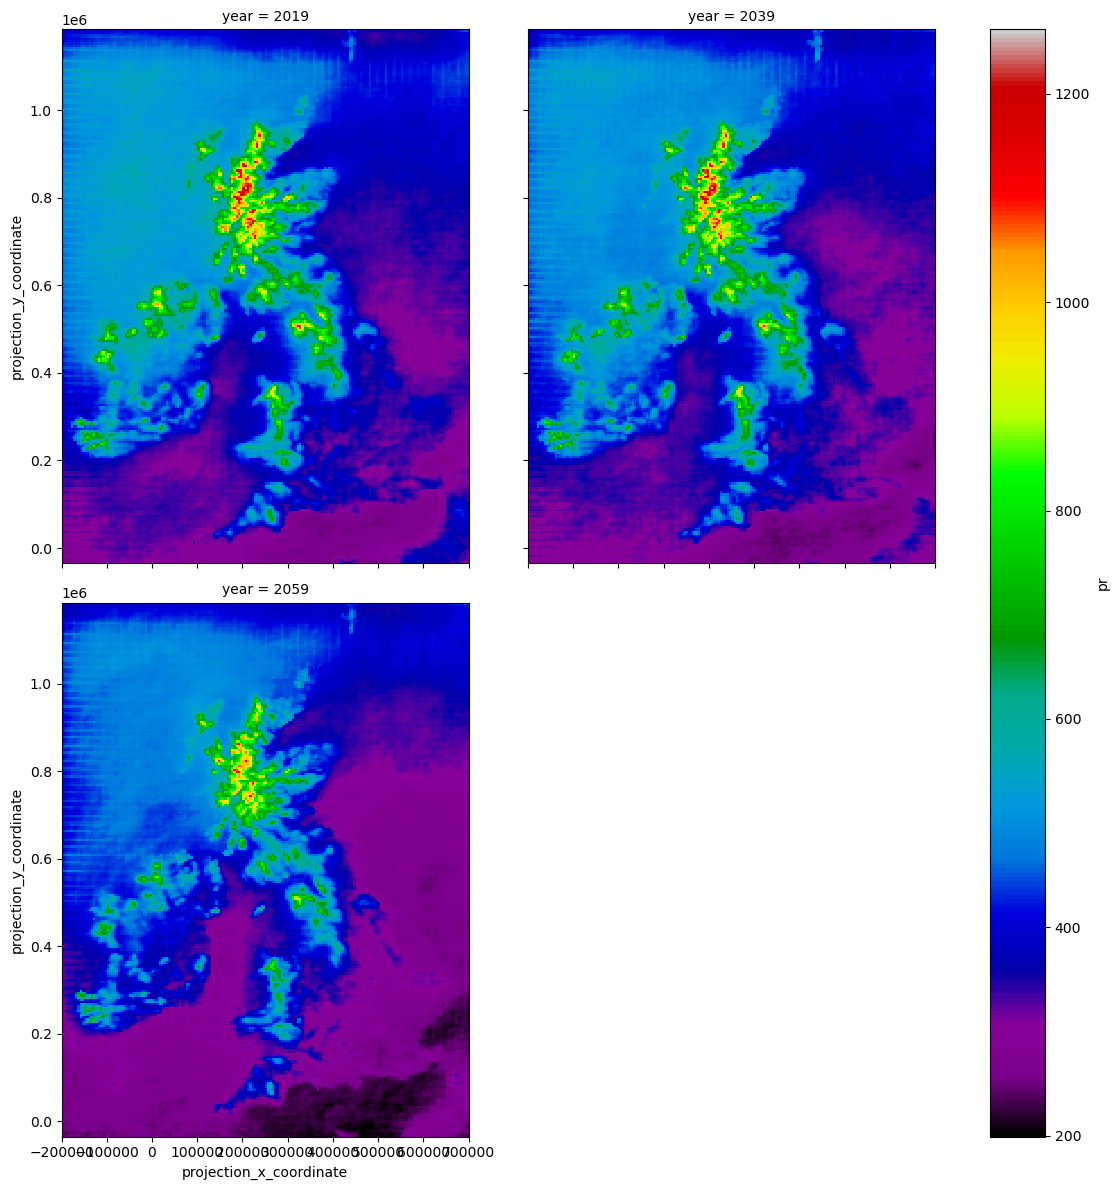

In [4]:
precip.plot(col='year',col_wrap=2, figsize=(12,12), cmap='nipy_spectral')

In [5]:
# read in output of processing
import rioxarray

In [6]:
final_dataset_dpath = '../app/../app/data/multi_year_precipitation_dataset_v3.grd'
ds2 = rioxarray.open_rasterio(final_dataset_dpath)

In [9]:
ds2.max()

<xarray.DataArray ()> Size: 2B
array(1262, dtype=uint16)
Coordinates:
    spatial_ref  int64 8B 0

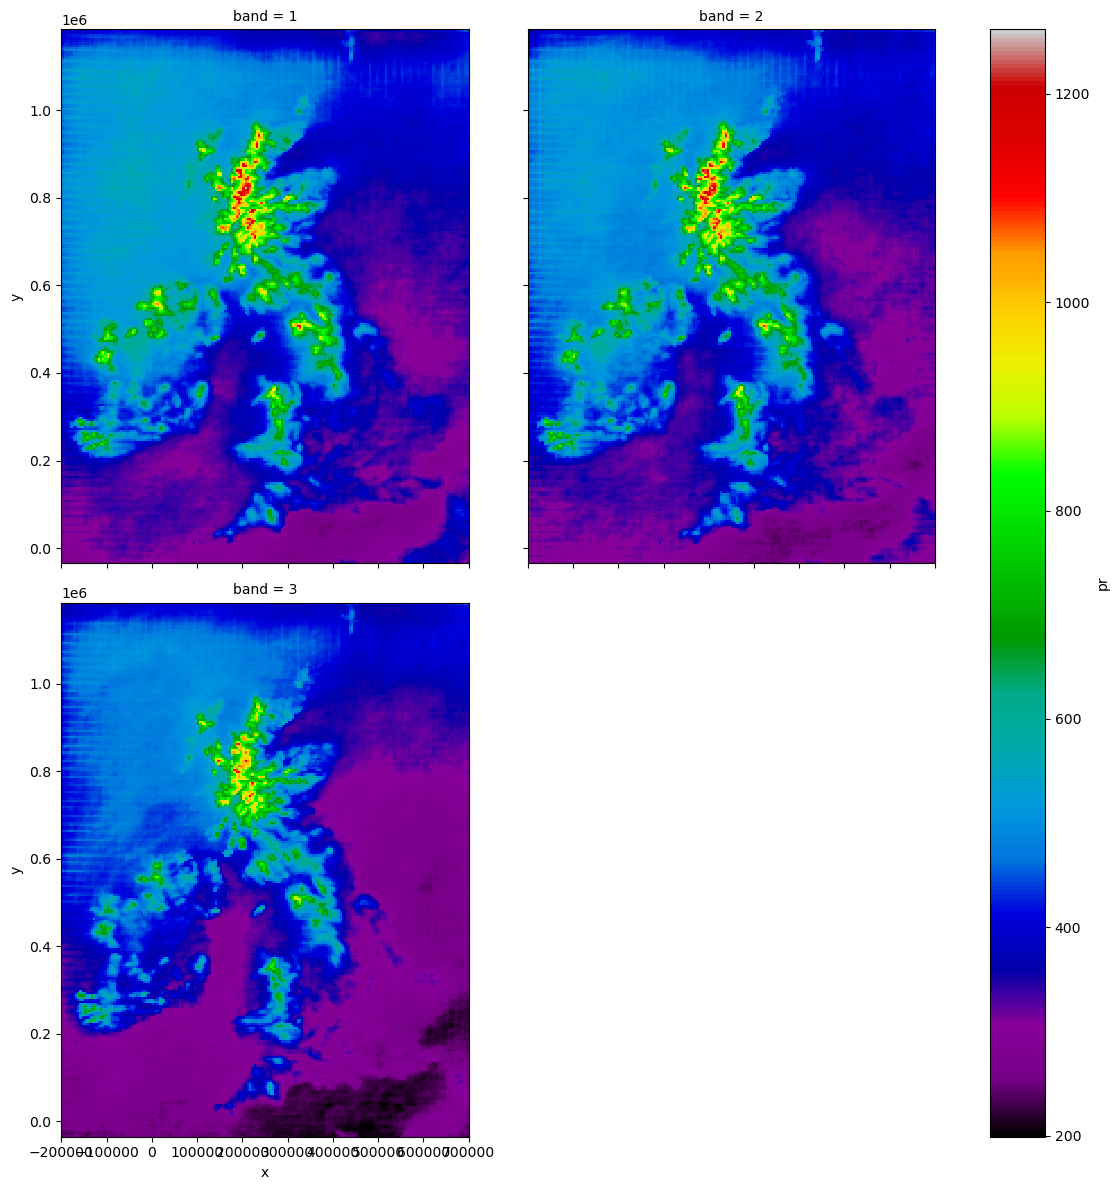

In [7]:
ds2.plot(col='band',col_wrap=2, figsize=(12,12), cmap='nipy_spectral')

In [8]:
print('total difference between this version and final version:')
(precip.values - ds2.values[:,::-1,:]).sum()

total difference between this version and final version:


0